# Lecture 3

In [98]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import TreebankWordTokenizer
import nltk

Let's transform the following text into the BOW.

In [99]:
sentence = "The faster Harry got to the store, the faster Harry, the faster, would get home."
tokenizer = TreebankWordTokenizer()

In [100]:
tokens = tokenizer.tokenize(sentence.lower())
tokens

['the',
 'faster',
 'harry',
 'got',
 'to',
 'the',
 'store',
 ',',
 'the',
 'faster',
 'harry',
 ',',
 'the',
 'faster',
 ',',
 'would',
 'get',
 'home',
 '.']

With your simple list, you want to get unique words from the document and their counts. A Python dictionary serves this purpose nicely, and because you want to count the words as well, you can use `Counter`

In [101]:
bag_of_words = Counter(tokens)
bag_of_words

Counter({'the': 4,
         'faster': 3,
         'harry': 2,
         'got': 1,
         'to': 1,
         'store': 1,
         ',': 3,
         'would': 1,
         'get': 1,
         'home': 1,
         '.': 1})

- The new order is optimized for storage, update, and retrieval, not consistent display.

- **What do we lose from the original sentence?**

In [102]:
bag_of_words.most_common(4)

[('the', 4), ('faster', 3), (',', 3), ('harry', 2)]

The number of times a word occurs in a given document is called the *term frequency*, commonly abbreviated `TF`.

Let's normalize this `TF` by the number unique tokens used for this sentence.

In [103]:
times_harry_appears = bag_of_words['harry']
num_unique_words = len(bag_of_words)
tf = times_harry_appears / num_unique_words
round(tf, 4)

0.1818

In [104]:
print(num_unique_words)

11


Let's pause here and go back to the slide

### Kite example

In [105]:
kite_text = "A kite is traditionally a tethered heavier-than-air craft with wing surfaces that react against the air to create lift and drag. A kite consists of wings, tethers, and anchors. Kites often have a bridle to guide the face of the kite at the correct angle so the wind can lift it. A kite's wing also may be so designed so a bridle is not needed; when kiting a sailplane for launch, the tether meets the wing at a single point. A kite may have fixed or moving anchors. Untraditionally in technical kiting, a kite consists of tether-set-coupled wing sets; even in technical kiting, though, a wing in the system is still often called the kite. The lift that sustains the kite in flight is generated when air flows around the kite's surface, producing low pressure above and high pressure below the wings. The interaction with the wind also generates horizontal drag along the direction of the wind. The resultant force vector from the lift and drag force components is opposed by the tension of one or more of the lines or tethers to which the kite is attached. The anchor point of the kite line may be static or moving (e.g., the towing of a kite by a running person, boat, free-falling anchors as in paragliders and fugitive parakites or vehicle). The same principles of fluid flow apply in liquids and kites are also used under water. A hybrid tethered craft comprising both a lighter-than-air balloon as well as a kite lifting surface is called a kytoon. Kites have a long and varied history and many different types are flown individually and at festivals worldwide. Kites may be flown for recreation, art or other practical uses. Sport kites can be flown in aerial ballet, sometimes as part of a competition. Power kites are multi-line steerable kites designed to generate large forces which can be used to power activities such as kite surfing, kite landboarding, kite fishing, kite buggying and a new trend snow kiting. Even Man-lifting kites have been made."

In [106]:
kite_text

"A kite is traditionally a tethered heavier-than-air craft with wing surfaces that react against the air to create lift and drag. A kite consists of wings, tethers, and anchors. Kites often have a bridle to guide the face of the kite at the correct angle so the wind can lift it. A kite's wing also may be so designed so a bridle is not needed; when kiting a sailplane for launch, the tether meets the wing at a single point. A kite may have fixed or moving anchors. Untraditionally in technical kiting, a kite consists of tether-set-coupled wing sets; even in technical kiting, though, a wing in the system is still often called the kite. The lift that sustains the kite in flight is generated when air flows around the kite's surface, producing low pressure above and high pressure below the wings. The interaction with the wind also generates horizontal drag along the direction of the wind. The resultant force vector from the lift and drag force components is opposed by the tension of one or mo

In [107]:
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(kite_text.lower())
token_counts = Counter(tokens)
token_counts

Counter({'a': 20,
         'kite': 16,
         'is': 7,
         'traditionally': 1,
         'tethered': 2,
         'heavier-than-air': 1,
         'craft': 2,
         'with': 2,
         'wing': 5,
         'surfaces': 1,
         'that': 2,
         'react': 1,
         'against': 1,
         'the': 26,
         'air': 2,
         'to': 5,
         'create': 1,
         'lift': 4,
         'and': 10,
         'drag.': 1,
         'consists': 2,
         'of': 10,
         'wings': 1,
         ',': 15,
         'tethers': 2,
         'anchors.': 2,
         'kites': 8,
         'often': 2,
         'have': 4,
         'bridle': 2,
         'guide': 1,
         'face': 1,
         'at': 3,
         'correct': 1,
         'angle': 1,
         'so': 3,
         'wind': 2,
         'can': 3,
         'it.': 1,
         "'s": 2,
         'also': 3,
         'may': 4,
         'be': 5,
         'designed': 2,
         'not': 1,
         'needed': 1,
         ';': 2,
         'when': 2,


In [108]:
# The TreebankWordTokenizer returns 'kite.' (with a period) as a token.
print(token_counts['kite.'])

1


In [109]:
token_counts.most_common(5)

[('the', 26), ('a', 20), ('kite', 16), (',', 15), ('and', 10)]

Note that there are a lot of stop words and punctuations

In [110]:
stopwords = nltk.corpus.stopwords.words('english')

In [111]:
tokens = [x for x in tokens if x not in stopwords]
kite_counts = Counter(tokens)
kite_counts

Counter({'kite': 16,
         'traditionally': 1,
         'tethered': 2,
         'heavier-than-air': 1,
         'craft': 2,
         'wing': 5,
         'surfaces': 1,
         'react': 1,
         'air': 2,
         'create': 1,
         'lift': 4,
         'drag.': 1,
         'consists': 2,
         'wings': 1,
         ',': 15,
         'tethers': 2,
         'anchors.': 2,
         'kites': 8,
         'often': 2,
         'bridle': 2,
         'guide': 1,
         'face': 1,
         'correct': 1,
         'angle': 1,
         'wind': 2,
         'it.': 1,
         "'s": 2,
         'also': 3,
         'may': 4,
         'designed': 2,
         'needed': 1,
         ';': 2,
         'kiting': 3,
         'sailplane': 1,
         'launch': 1,
         'tether': 1,
         'meets': 1,
         'single': 1,
         'point.': 1,
         'fixed': 1,
         'moving': 2,
         'untraditionally': 1,
         'technical': 2,
         'tether-set-coupled': 1,
         'sets': 1,

In [112]:
kite_counts.most_common(7)

[('kite', 16),
 (',', 15),
 ('kites', 8),
 ('wing', 5),
 ('lift', 4),
 ('may', 4),
 ('also', 3)]

Certainly, we can guess what this document is about based on the count of words

## 3.2 Vectorizing

Instead of describing a document in terms of a frequency dictionary, you’ll make a vector of those word counts

In [113]:
document_vector = []
doc_length = len(tokens)
for key, value in kite_counts.most_common():
    document_vector.append(value / doc_length)

document_vector[:10]

[0.07207207207207207,
 0.06756756756756757,
 0.036036036036036036,
 0.02252252252252252,
 0.018018018018018018,
 0.018018018018018018,
 0.013513513513513514,
 0.013513513513513514,
 0.013513513513513514,
 0.009009009009009009]

 You can speed up processing of these data structures many ways.
 
 For now you’re just playing with the nuts and bolts, but soon you’ll want to speed things up.

 Now consider the follwoing three sentences.

In [114]:
doc_0 = "The faster Harry got to the store, the faster Harry, the faster, would get home."
doc_1 = "Harry is hairy and faster than Jill."
doc_2 = "Jill is not as hairy as Harry."

tokens_0 = tokenizer.tokenize(doc_0.lower())
tokens_1 = tokenizer.tokenize(doc_1.lower())
tokens_2 = tokenizer.tokenize(doc_2.lower())
lexicon = set(tokens_0 + tokens_1 + tokens_2)

print(lexicon)

{',', 'get', 'than', '.', 'hairy', 'got', 'the', 'not', 'faster', 'as', 'to', 'home', 'would', 'is', 'harry', 'jill', 'and', 'store'}


In [115]:
len(lexicon)

18

What does the `lexicon` variable indicate?

In [116]:
from collections import OrderedDict

vector_template = OrderedDict((token, 0) for token in lexicon)
print(vector_template)

OrderedDict([(',', 0), ('get', 0), ('than', 0), ('.', 0), ('hairy', 0), ('got', 0), ('the', 0), ('not', 0), ('faster', 0), ('as', 0), ('to', 0), ('home', 0), ('would', 0), ('is', 0), ('harry', 0), ('jill', 0), ('and', 0), ('store', 0)])


In [117]:
import copy

document_vectors = []
for doc in [doc_0, doc_1, doc_2]:

    vec = copy.copy(vector_template)  # So we are dealing with new objects, not multiple references to the same object

    tokens = tokenizer.tokenize(doc.lower())
    token_counts = Counter(tokens)

    for key, value in token_counts.items():
        vec[key] = value / len(lexicon)
    document_vectors.append(vec)

In [118]:
type(document_vectors)

list

In [119]:
len(document_vectors)

3

In [120]:
document_vectors[0]

OrderedDict([(',', 0.16666666666666666),
             ('get', 0.05555555555555555),
             ('than', 0),
             ('.', 0.05555555555555555),
             ('hairy', 0),
             ('got', 0.05555555555555555),
             ('the', 0.2222222222222222),
             ('not', 0),
             ('faster', 0.16666666666666666),
             ('as', 0),
             ('to', 0.05555555555555555),
             ('home', 0.05555555555555555),
             ('would', 0.05555555555555555),
             ('is', 0),
             ('harry', 0.1111111111111111),
             ('jill', 0),
             ('and', 0),
             ('store', 0.05555555555555555)])

In [121]:
document_vectors[1]

OrderedDict([(',', 0),
             ('get', 0),
             ('than', 0.05555555555555555),
             ('.', 0.05555555555555555),
             ('hairy', 0.05555555555555555),
             ('got', 0),
             ('the', 0),
             ('not', 0),
             ('faster', 0.05555555555555555),
             ('as', 0),
             ('to', 0),
             ('home', 0),
             ('would', 0),
             ('is', 0.05555555555555555),
             ('harry', 0.05555555555555555),
             ('jill', 0.05555555555555555),
             ('and', 0.05555555555555555),
             ('store', 0)])

In [122]:
document_vectors[2]

OrderedDict([(',', 0),
             ('get', 0),
             ('than', 0),
             ('.', 0.05555555555555555),
             ('hairy', 0.05555555555555555),
             ('got', 0),
             ('the', 0),
             ('not', 0.05555555555555555),
             ('faster', 0),
             ('as', 0.1111111111111111),
             ('to', 0),
             ('home', 0),
             ('would', 0),
             ('is', 0.05555555555555555),
             ('harry', 0.05555555555555555),
             ('jill', 0.05555555555555555),
             ('and', 0),
             ('store', 0)])

Let's pause here.

In [123]:
import math

def cosine_sim(vec1, vec2):
    """
    Since our vectors are dictionaries, lets convert them to lists for easier mathing.
    """
    vec1 = [val for val in vec1.values()]
    vec2 = [val for val in vec2.values()]
    
    dot_prod = 0
    for i, v in enumerate(vec1):
        dot_prod += v * vec2[i]
        
    mag_1 = math.sqrt(sum([x**2 for x in vec1]))
    mag_2 = math.sqrt(sum([x**2 for x in vec2]))
    
    return dot_prod / (mag_1 * mag_2)

# 3.2 Zipf's Law

#### The relationship between the population of US cities and the rank of that population

In [124]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population', header=0)
dfs[4].head(5)

,2021 rank,City,State[c],2021 estimate,2020 census,Change,2020 land area,2020 land area.1,2020 population density,2020 population density.1,Location
0,1,New York[d],New York,8467513,8804190,−3.82%,300.5 sq mi,778.3 km2,"29,298/sq mi","11,312/km2",".mw-parser-output .geo-default,.mw-parser-outp..."
1,2,Los Angeles,California,3849297,3898747,−1.27%,469.5 sq mi,"1,216.0 km2","8,304/sq mi","3,206/km2",34°01′N 118°25′W﻿ / ﻿34.02°N 118.41°W
2,3,Chicago,Illinois,2696555,2746388,−1.81%,227.7 sq mi,589.7 km2,"12,061/sq mi","4,657/km2",41°50′N 87°41′W﻿ / ﻿41.84°N 87.68°W
3,4,Houston,Texas,2288250,2304580,−0.71%,640.4 sq mi,"1,658.6 km2","3,599/sq mi","1,390/km2",29°47′N 95°23′W﻿ / ﻿29.79°N 95.39°W
4,5,Phoenix,Arizona,1624569,1608139,+1.02%,518.0 sq mi,"1,341.6 km2","3,105/sq mi","1,199/km2",33°34′N 112°05′W﻿ / ﻿33.57°N 112.09°W


In [125]:
df = dfs[4]

In [126]:
rankpop = df[['2021 rank','2021 estimate']]
rankpop.set_index('2021 rank', inplace=True)

In [127]:
rankpop

,2021 estimate
2021 rank,
1,8467513
2,3849297
3,2696555
4,2288250
5,1624569
...,...
327,100843
328,100777
329,100758


In [128]:
print(rankpop.iloc[0]/rankpop.iloc[1])
print(rankpop.iloc[0]/rankpop.iloc[2])

2021 estimate    2.199756
dtype: float64
2021 estimate    3.140122
dtype: float64


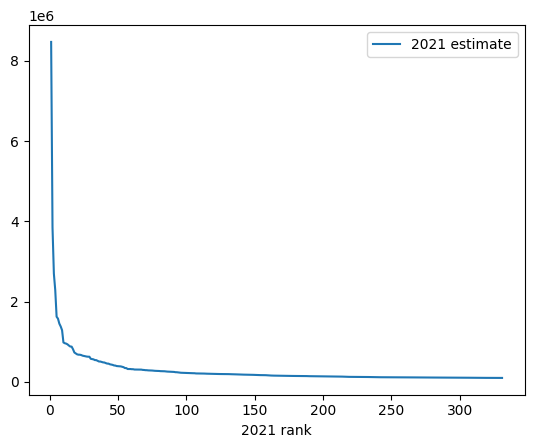

In [129]:
rankpop.plot()
plt.show()

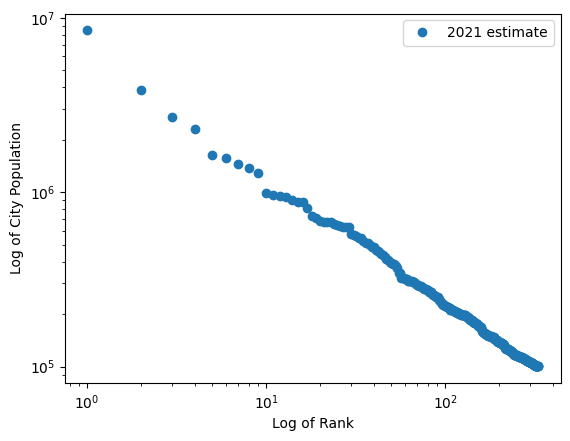

In [130]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
rankpop.plot(style='o', logx=True, logy=True, ax=ax)

xlabel = plt.xlabel('Log of Rank')
ylabel = plt.ylabel('Log of City Population')
plt.show(block=False)

In [131]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     /Users/yeabinmoon/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [132]:
from nltk.corpus import brown

In [133]:
brown.words()[:10]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [134]:
brown.tagged_words()[:5]

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL')]

In [135]:
puncs = [',', '.', '--', '-', '!', '?', ':', ';', '``', "''", '(', ')', '[', ']']
word_list = [x.lower() for x in brown.words() if x not in puncs]
token_counts = Counter(word_list)
print(token_counts.most_common(20))

[('the', 69971), ('of', 36412), ('and', 28853), ('to', 26158), ('a', 23195), ('in', 21337), ('that', 10594), ('is', 10109), ('was', 9815), ('he', 9548), ('for', 9489), ('it', 8760), ('with', 7289), ('as', 7253), ('his', 6996), ('on', 6741), ('be', 6377), ('at', 5372), ('by', 5306), ('i', 5164)]


In [136]:
pd.DataFrame.from_dict(dict(token_counts.most_common()), orient='index', columns=['freq'])

,freq
the,69971
of,36412
and,28853
to,26158
a,23195
...,...
aviary,1
olive-flushed,1
coral-colored,1
boucle,1


In [137]:
brown_df = pd.DataFrame.from_dict(dict(token_counts.most_common()), orient='index', columns=['freq'])

In [138]:
print(brown_df.iloc[0]/brown_df.iloc[1])
print(brown_df.iloc[0]/brown_df.iloc[2])

freq    1.921647
dtype: float64
freq    2.425086
dtype: float64


# 3.4 Topic Modeling

In [139]:
history_text = 'Kites were invented in China, where materials ideal for kite building were readily available: silk fabric for sail material; fine, high-tensile-strength silk for flying line; and resilient bamboo for a strong, lightweight framework. The kite has been claimed as the invention of the 5th-century BC Chinese philosophers Mozi (also Mo Di) and Lu Ban (also Gongshu Ban). By 549 AD paper kites were certainly being flown, as it was recorded that in that year a paper kite was used as a message for a rescue mission. Ancient and medieval Chinese sources describe kites being used for measuring distances, testing the wind, lifting men, signaling, and communication for military operations. The earliest known Chinese kites were flat (not bowed) and often rectangular. Later, tailless kites incorporated a stabilizing bowline. Kites were decorated with mythological motifs and legendary figures; some were fitted with strings and whistles to make musical sounds while flying. From China, kites were introduced to Cambodia, Thailand, India, Japan, Korea and the western world. After its introduction into India, the kite further evolved into the fighter kite, known as the patang in India, where thousands are flown every year on festivals such as Makar Sankranti. Kites were known throughout Polynesia, as far as New Zealand, with the assumption being that the knowledge diffused from China along with the people. Anthropomorphic kites made from cloth and wood were used in religious ceremonies to send prayers to the gods. Polynesian kite traditions are used by anthropologists get an idea of early "primitive" Asian traditions that are believed to have at one time existed in Asia.'

In [140]:
# intro_text = "A kite is traditionally ..."  # Step left to user, as above
intro_text = kite_text.lower()
intro_tokens = tokenizer.tokenize(intro_text)
# history_text = "Kites were invented in China, ..."  # Also as above
history_text = history_text.lower()
history_tokens = tokenizer.tokenize(history_text)
intro_total = len(intro_tokens)
print(intro_total)
history_total = len(history_tokens)
print(history_total)

363
297


**What are these two numbers?**

In [141]:
intro_tf = {}
history_tf = {}

In [142]:
intro_counts = Counter(intro_tokens)
intro_counts

Counter({'a': 20,
         'kite': 16,
         'is': 7,
         'traditionally': 1,
         'tethered': 2,
         'heavier-than-air': 1,
         'craft': 2,
         'with': 2,
         'wing': 5,
         'surfaces': 1,
         'that': 2,
         'react': 1,
         'against': 1,
         'the': 26,
         'air': 2,
         'to': 5,
         'create': 1,
         'lift': 4,
         'and': 10,
         'drag.': 1,
         'consists': 2,
         'of': 10,
         'wings': 1,
         ',': 15,
         'tethers': 2,
         'anchors.': 2,
         'kites': 8,
         'often': 2,
         'have': 4,
         'bridle': 2,
         'guide': 1,
         'face': 1,
         'at': 3,
         'correct': 1,
         'angle': 1,
         'so': 3,
         'wind': 2,
         'can': 3,
         'it.': 1,
         "'s": 2,
         'also': 3,
         'may': 4,
         'be': 5,
         'designed': 2,
         'not': 1,
         'needed': 1,
         ';': 2,
         'when': 2,


In [143]:
intro_counts['kite']

16

In [144]:
intro_counts['kite'] / intro_total

0.0440771349862259

In [145]:
intro_tf['kite'] = intro_counts['kite'] / intro_total
history_counts = Counter(history_tokens)
history_tf['kite'] = history_counts['kite'] / history_total
print('Term Frequency of "kite" in intro is: {:.4f}'.format(intro_tf['kite']))
print('Term Frequency of "kite" in history is: {:.4f}'.format(history_tf['kite']))

Term Frequency of "kite" in intro is: 0.0441
Term Frequency of "kite" in history is: 0.0202


**Exlpain in words!**

In [146]:
intro_tf['and'] = intro_counts['and'] / intro_total
history_tf['and'] = history_counts['and'] / history_total
print('Term Frequency of "and" in intro is: {:.4f}'.format(intro_tf['and']))
print('Term Frequency of "and" in history is: {:.4f}'.format(history_tf['and']))

Term Frequency of "and" in intro is: 0.0275
Term Frequency of "and" in history is: 0.0303


In [147]:
print(intro_counts['kite'], history_counts['kite'])

16 6


Let's pause here.

In [148]:
num_docs_containing_and = 0
for doc in [intro_tokens, history_tokens]:
    if 'and' in doc:
        num_docs_containing_and += 1

In [149]:
num_docs_containing_kite = 0
for doc in [intro_tokens, history_tokens]:
    if 'kite' in doc:
        num_docs_containing_kite += 1

In [150]:
num_docs_containing_china = 0
for doc in [intro_tokens, history_tokens]:
    if 'china' in doc:
        num_docs_containing_china += 1

In [151]:
intro_tf['china'] = intro_counts['china'] / intro_total
history_tf['china'] = history_counts['china'] / history_total

In [152]:
num_docs = 2
intro_idf = {}
history_idf = {}
intro_idf['and'] = num_docs / num_docs_containing_and 
history_idf['and'] = num_docs / num_docs_containing_and 
intro_idf['kite'] = num_docs / num_docs_containing_kite 
history_idf['kite'] = num_docs / num_docs_containing_kite 
intro_idf['china'] = num_docs / num_docs_containing_china 
history_idf['china'] = num_docs / num_docs_containing_china 

In [153]:
intro_idf

{'and': 1.0, 'kite': 1.0, 'china': 2.0}

In [154]:
history_idf

{'and': 1.0, 'kite': 1.0, 'china': 2.0}

**What are we doing?**

In [155]:
intro_tfidf = {}

intro_tfidf['and'] = intro_tf['and'] * intro_idf['and']
intro_tfidf['kite'] = intro_tf['kite'] * intro_idf['kite']
intro_tfidf['china'] = intro_tf['china'] * intro_idf['china']

history_tfidf = {}

history_tfidf['and'] = history_tf['and'] * history_idf['and']
history_tfidf['kite'] = history_tf['kite'] * history_idf['kite']
history_tfidf['china'] = history_tf['china'] * history_idf['china']

In [156]:
intro_tfidf

{'and': 0.027548209366391185, 'kite': 0.0440771349862259, 'china': 0.0}

In [157]:
history_tfidf

{'and': 0.030303030303030304,
 'kite': 0.020202020202020204,
 'china': 0.020202020202020204}

Let's pause

## 3.4.2 Relevance ranking

In [161]:
document_tfidf_vectors = []
documents = [doc_0, doc_1, doc_2]
documents

['The faster Harry got to the store, the faster Harry, the faster, would get home.',
 'Harry is hairy and faster than Jill.',
 'Jill is not as hairy as Harry.']

In [162]:
document_tfidf_vectors = []
documents = [doc_0, doc_1, doc_2]
for doc in documents:

    vec = copy.copy(vector_template)  

    tokens = tokenizer.tokenize(doc.lower())
    token_counts = Counter(tokens)

    for key, value in token_counts.items():
        docs_containing_key = 0
        for _doc in documents:
          if key in _doc:
            docs_containing_key += 1
        tf = value / len(lexicon)
        if docs_containing_key:
            idf = len(documents) / docs_containing_key
        else:
            idf = 0
        vec[key] = tf * idf 
    document_tfidf_vectors.append(vec)

In [164]:
document_tfidf_vectors

[OrderedDict([(',', 0.5),
              ('get', 0.16666666666666666),
              ('than', 0),
              ('.', 0.05555555555555555),
              ('hairy', 0),
              ('got', 0.16666666666666666),
              ('the', 0.6666666666666666),
              ('not', 0),
              ('faster', 0.25),
              ('as', 0),
              ('to', 0.16666666666666666),
              ('home', 0.16666666666666666),
              ('would', 0.16666666666666666),
              ('is', 0),
              ('harry', 0.0),
              ('jill', 0),
              ('and', 0),
              ('store', 0.16666666666666666)]),
 OrderedDict([(',', 0),
              ('get', 0),
              ('than', 0.16666666666666666),
              ('.', 0.05555555555555555),
              ('hairy', 0.08333333333333333),
              ('got', 0),
              ('the', 0),
              ('not', 0),
              ('faster', 0.08333333333333333),
              ('as', 0),
              ('to', 0),
              (

In [40]:
query = "How long does it take to get to the store?"

query_vec = copy.copy(vector_template)  # So we are dealing with new objects, not multiple references to the same object

tokens = tokenizer.tokenize(query.lower())
token_counts = Counter(tokens)

for key, value in token_counts.items():
    docs_containing_key = 0
    for _doc in documents:
      if key in _doc.lower():
        docs_containing_key += 1
    if docs_containing_key == 0:  # We didn't find that token in the lexicon go to next key
        continue
    tf = value / len(tokens)
    idf = len(documents) / docs_containing_key 
    query_vec[key] = tf * idf 

print(cosine_sim(query_vec, document_tfidf_vectors[0]))
print(cosine_sim(query_vec, document_tfidf_vectors[1]))
print(cosine_sim(query_vec, document_tfidf_vectors[2]))

0.5235048549676834
0.0
0.0


In [75]:
documents

['The faster Harry got to the store, the faster Harry, the faster, would get home.',
 'Harry is hairy and faster than Jill.',
 'Jill is not as hairy as Harry.']

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [doc_0, doc_1, doc_2]

vectorizer = TfidfVectorizer(min_df=1)
model = vectorizer.fit_transform(corpus)

print(model.todense())  # The model becomes a sparse numpy matrix, as in a large corpus there would be mostly zeros to deal with.  todense() brings it back to a regular numpy matrix for our viewing pleasure.

[[0.         0.         0.42662402 0.18698644 0.18698644 0.
  0.22087441 0.18698644 0.         0.         0.         0.18698644
  0.         0.74794576 0.18698644 0.18698644]
 [0.46312056 0.         0.35221512 0.         0.         0.35221512
  0.27352646 0.         0.35221512 0.35221512 0.         0.
  0.46312056 0.         0.         0.        ]
 [0.         0.75143242 0.         0.         0.         0.28574186
  0.22190405 0.         0.28574186 0.28574186 0.37571621 0.
  0.         0.         0.         0.        ]]


In [83]:
print(vectorizer.get_feature_names_out())
len(vectorizer.get_feature_names_out())

['and' 'as' 'faster' 'get' 'got' 'hairy' 'harry' 'home' 'is' 'jill' 'not'
 'store' 'than' 'the' 'to' 'would']


16

In [84]:
print(lexicon)
len(lexicon)

{',', 'store', 'would', 'home', 'as', 'jill', 'the', 'faster', '.', 'and', 'is', 'hairy', 'than', 'harry', 'get', 'to', 'not', 'got'}


18

In [86]:
document_tfidf_vectors[0]

OrderedDict([(',', 0.47368421052631576),
             ('store', 0.15789473684210525),
             ('would', 0.15789473684210525),
             ('home', 0.15789473684210525),
             ('as', 0),
             ('jill', 0),
             ('the', 0.631578947368421),
             ('faster', 0.23684210526315788),
             ('.', 0.05263157894736842),
             ('and', 0),
             ('is', 0),
             ('hairy', 0),
             ('than', 0),
             ('harry', 0.0),
             ('get', 0.15789473684210525),
             ('to', 0.15789473684210525),
             ('not', 0),
             ('got', 0.15789473684210525)])